# Challenge: Optimization on Other Datasets

## Download data from `yfinance`

In [1]:
import yfinance as yf

ticker = 'WMT'
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-08-25,0.021159,0.021566,0.021159,0.021484,0.011698,7526400
1972-08-28,0.021484,0.021647,0.021403,0.021403,0.011654,2918400
1972-08-29,0.021322,0.021322,0.021159,0.021159,0.011521,5836800
1972-08-30,0.021159,0.021159,0.020996,0.021159,0.011521,1228800
1972-08-31,0.020996,0.020996,0.020833,0.020833,0.011343,2611200
...,...,...,...,...,...,...
2024-05-21,64.529999,65.190002,64.449997,65.150002,65.150002,17131700
2024-05-22,64.980003,65.690002,64.730003,65.250000,65.250000,14879400
2024-05-23,65.169998,65.519997,64.559998,64.839996,64.839996,16222900


## Preprocess the data

### Filter the date range

- Since 1 year ago at least

In [2]:
df = df.loc['2020-01-01':].copy()

### Create the target variable

#### Percentage change

- Percentage change on `Adj Close` for tomorrow

In [3]:
df['change_tomorrow'] = df['Adj Close'].pct_change(-1)
df.change_tomorrow = df.change_tomorrow * -1
df.change_tomorrow = df.change_tomorrow * 100

#### Remove rows with any missing data

In [4]:
df = df.dropna().copy()
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,39.619999,39.963333,39.566666,39.646667,36.969147,20294700,-0.890649
2020-01-03,39.423332,39.596668,39.196667,39.296665,36.642788,16197600,-0.203972
2020-01-06,39.133331,39.363335,38.923332,39.216667,36.568199,19336500,-0.935191
2020-01-07,39.086666,39.173332,38.733334,38.853333,36.229385,20540700,-0.344310
2020-01-08,38.766666,38.910000,38.560001,38.720001,36.105072,17627400,1.022463
...,...,...,...,...,...,...,...
2024-05-20,64.419998,64.760002,63.869999,64.180000,64.180000,15001400,1.488874
2024-05-21,64.529999,65.190002,64.449997,65.150002,65.150002,17131700,0.153254
2024-05-22,64.980003,65.690002,64.730003,65.250000,65.250000,14879400,-0.632331


## Compute Machine Learning model

Proposal: Random Forest within `ensemble` module of `sklearn` library

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

In [6]:
df_explanatory = df.iloc[:,:-1]
df_explanatory

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,39.619999,39.963333,39.566666,39.646667,36.969147,20294700
2020-01-03,39.423332,39.596668,39.196667,39.296665,36.642788,16197600
2020-01-06,39.133331,39.363335,38.923332,39.216667,36.568199,19336500
2020-01-07,39.086666,39.173332,38.733334,38.853333,36.229385,20540700
2020-01-08,38.766666,38.910000,38.560001,38.720001,36.105072,17627400
...,...,...,...,...,...,...
2024-05-20,64.419998,64.760002,63.869999,64.180000,64.180000,15001400
2024-05-21,64.529999,65.190002,64.449997,65.150002,65.150002,17131700
2024-05-22,64.980003,65.690002,64.730003,65.250000,65.250000,14879400


In [7]:
target = df.iloc[:, -1]
target

Date
2020-01-02   -0.890649
2020-01-03   -0.203972
2020-01-06   -0.935191
2020-01-07   -0.344310
2020-01-08    1.022463
                ...   
2024-05-20    1.488874
2024-05-21    0.153254
2024-05-22   -0.632331
2024-05-23    0.825942
2024-05-24   -0.522750
Name: change_tomorrow, Length: 1107, dtype: float64

In [8]:
rf = RandomForestRegressor(max_depth=15)

rf.fit(X=df_explanatory, y=target)

RandomForestRegressor(max_depth=15)

In [10]:
predict = rf.predict(df_explanatory)

df_predictions = pd.DataFrame(target)

df_predictions['Prediction'] = predict                  
df_predictions

,change_tomorrow,Prediction
Date,,
2020-01-02,-0.890649,-0.190114
2020-01-03,-0.203972,-0.110805
2020-01-06,-0.935191,-0.633074
2020-01-07,-0.344310,-0.531244
2020-01-08,1.022463,0.310526
...,...,...
2024-05-20,1.488874,0.232007
2024-05-21,0.153254,0.088554
2024-05-22,-0.632331,-0.170077


In [11]:
accuracy = rf.score(df_explanatory, target)
print(accuracy)

mse = mean_squared_error(target, predict)
rmse = mse ** .5

print(rmse)

0.685538748547938
0.8186127952374832


## Parametrize & optimize the investment strategy

### Create Strategy class

In [15]:
explanatoryDay = df_explanatory.iloc[[-1], :]
print(explanatoryDay)


pred_Day = rf.predict(explanatoryDay)[0]
print(pred_Day)

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2024-05-24  65.129997  65.690002  65.010002  65.379997  65.379997  11793800
-0.06482483002261712


In [16]:
from backtesting import Strategy

class RegressionStrat(Strategy):
  limit_buy = 1
  limit_sell = -1

  def init(self):
    self.model = rf
    self.already_bought = False

  def next(self):
    explanatory = self.data.df.iloc[[-1], :]
    
    prediction = self.model.predict(explanatory)[0]

    if(prediction > self.limit_buy and self.already_bought == False):
      self.buy()
      self.already_bought = True

    elif(prediction < self.limit_sell and self.already_bought == True):
      self.sell()
      self.already_bought = False

    else:
        pass



### Create `Backtest` class

In [14]:
from backtesting import Backtest

In [15]:
bt = Backtest(
    df_explanatory, RegressionStrat, cash=10000,
    commission=.002, exclusive_orders=True
)

bt.run()

Start                     2020-01-02 00:00:00
End                       2024-02-16 00:00:00
Duration                   1506 days 00:00:00
Exposure Time [%]                   96.150144
Equity Final [$]                 35997.837487
Equity Peak [$]                  45817.685994
Return [%]                         259.978375
Buy & Hold Return [%]               43.231879
Return (Ann.) [%]                   36.433112
Volatility (Ann.) [%]               30.512295
Sharpe Ratio                         1.194047
Sortino Ratio                        2.913349
Calmar Ratio                         1.699905
Max. Drawdown [%]                  -21.432441
Avg. Drawdown [%]                   -3.263351
Max. Drawdown Duration      343 days 00:00:00
Avg. Drawdown Duration       27 days 00:00:00
# Trades                                   34
Win Rate [%]                        70.588235
Best Trade [%]                      20.796049
Worst Trade [%]                     -16.25758
Avg. Trade [%]                    

### Optimize backtesting with multiple combinations

In [21]:
import multiprocessing as mp
mp.set_start_method('fork', force=True)

In [29]:
stats_skopt, heatmap, optimize_result = bt.optimize(
    limit_buy = [0, 10],      # Note: For method="skopt", we
    limit_sell = [-10, 0],      # only need interval end-points
    #constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Return [%]',
    method='skopt',
    max_tries=500,
    random_state=0,
    return_heatmap=True,
    return_optimization=True)



KeyboardInterrupt: 

In [18]:
#pip install --upgrade pip

In [19]:
#pip uninstall scikit-learn -y

In [20]:
#pip install scikit-learn==1.0.2

In [21]:
#import sklearn
#print(sklearn.__version__)

In [22]:
#pip list

### Which are the best values for the parameters?

In [23]:
heatmap.reset_index()

,limit_buy,limit_sell,Return [%]
0,0,-9,67.683255
1,1,-7,81.152635
2,1,-5,70.353539
3,2,-6,50.517497
4,2,-4,-16.200650
5,2,-2,28.321718
6,3,-8,81.152635
7,3,-3,-12.812062
8,3,-1,-14.079887
9,4,-10,81.152635


In [24]:
dff = heatmap.reset_index()
dff = dff.pivot(index ='limit_buy', columns = 'limit_sell', values='Return [%]')
dff

limit_sell,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
limit_buy,,,,,,,,,,,
0,NaN,67.683255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,81.152635,NaN,70.353539,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,50.517497,NaN,-16.20065,NaN,28.321718,NaN,NaN
3,NaN,NaN,81.152635,NaN,NaN,NaN,NaN,-12.812062,NaN,-14.079887,NaN
4,81.152635,NaN,81.152635,NaN,NaN,NaN,NaN,-34.233497,-57.564378,NaN,NaN
5,NaN,NaN,NaN,81.152635,NaN,-31.727116,NaN,NaN,NaN,-51.531093,-51.531093
6,NaN,81.152635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,79.978826,NaN,79.978826,NaN,NaN,NaN,NaN,NaN,NaN,-57.553336
8,72.781765,NaN,NaN,72.781765,-31.621919,-31.621919,NaN,-27.086127,NaN,NaN,NaN


In [25]:
dff.style.highlight_null(props='background-color: transparent; color:transparent')

limit_sell,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
limit_buy,,,,,,,,,,,
0,nan,67.683255,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,81.152635,nan,70.353539,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,50.517497,nan,-16.200650,nan,28.321718,nan,nan
3,nan,nan,81.152635,nan,nan,nan,nan,-12.812062,nan,-14.079887,nan
4,81.152635,nan,81.152635,nan,nan,nan,nan,-34.233497,-57.564378,nan,nan
5,nan,nan,nan,81.152635,nan,-31.727116,nan,nan,nan,-51.531093,-51.531093
6,nan,81.152635,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,nan,79.978826,nan,79.978826,nan,nan,nan,nan,nan,nan,-57.553336
8,72.781765,nan,nan,72.781765,-31.621919,-31.621919,nan,-27.086127,nan,nan,nan


In [26]:
import numpy as np

In [30]:
dff.sort_index(axis=1, ascending=False)\
    .style.format(precision=0)\
    .background_gradient(vmin=np.amin(dff), vmax=np.amax(dff))\
    .highlight_null(props='background_color: transparent; color: transparent')

limit_sell,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10
limit_buy,,,,,,,,,,,
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,68,nan
1,nan,nan,nan,nan,nan,70,nan,81,nan,nan,nan
2,nan,nan,28,nan,-16,nan,51,nan,nan,nan,nan
3,nan,-14,nan,-13,nan,nan,nan,nan,81,nan,nan
4,nan,nan,-58,-34,nan,nan,nan,nan,81,nan,81
5,-52,-52,nan,nan,nan,-32,nan,81,nan,nan,nan
6,nan,nan,nan,nan,nan,nan,nan,nan,nan,81,nan
7,-58,nan,nan,nan,nan,nan,nan,80,nan,80,nan
8,nan,nan,nan,-27,nan,-32,-32,73,nan,nan,73


### How to interpret smart optimization?

#### Number of evaluations

https://kernc.github.io/backtesting.py/doc/examples/Parameter%20Heatmap%20&%20Optimization.html

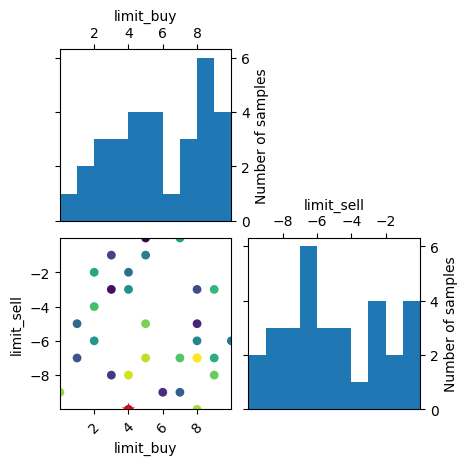

In [31]:
from skopt.plots import plot_evaluations

_ = plot_evaluations(optimize_result, bins=10)

#### Density

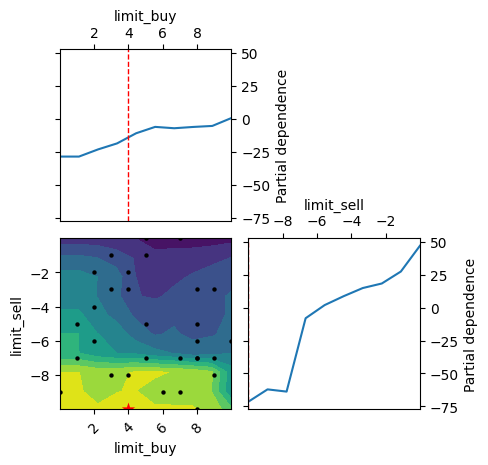

In [32]:
from skopt.plots import plot_objective

_ = plot_objective(optimize_result, n_points=10)

In [33]:
print(stats_skopt)

Start                     2020-01-02 00:00:00
End                       2024-05-24 00:00:00
Duration                   1604 days 00:00:00
Exposure Time [%]                   96.386631
Equity Final [$]                  18115.26347
Equity Peak [$]                  18148.624233
Return [%]                          81.152635
Buy & Hold Return [%]               64.906665
Return (Ann.) [%]                    14.48323
Volatility (Ann.) [%]               26.510992
Sharpe Ratio                          0.54631
Sortino Ratio                        0.925285
Calmar Ratio                         0.557205
Max. Drawdown [%]                  -25.992624
Avg. Drawdown [%]                   -4.035325
Max. Drawdown Duration      492 days 00:00:00
Avg. Drawdown Duration       44 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      81.226748
Worst Trade [%]                     81.226748
Avg. Trade [%]                    

## How to solve the overfitting problem?

> Backtest the investment strategy on a validation set.

Next chapter → [The Overfitting Problem in Backtesting]()

![](<src/09_Table_The Overfitting.png>)